<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/15_GolfBall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 応用例）ゴルフボールの在庫切れ判定データの画像処理

## 画像の明るさを用いて判断する例

ボールの有無で画像の明るさが変化することを利用して検出できるかどうかの実験

*   ある場所：明るい
*   ない場所：暗い

In [ ]:
#@title サンプル画像データ
!wget https://storage.googleapis.com/iotcolab2023/20230129-153218_low.jpg -O a_low.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230129-164717_low.jpg -O b_low.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230129-170117_low.jpg -O c_low.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230205-185817_low.jpg -O d_low.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230201-210218_low.jpg -O e_low.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230130-075919.jpg -O f.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230131-024019.jpg -O g.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230131-074418.jpg -O h.jpg
!wget https://storage.googleapis.com/iotcolab2023/20230131-124720.jpg -O i.jpg

--2023-02-11 02:44:03--  https://storage.googleapis.com/iotcolab2023/20230129-153218_low.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110321 (108K) [image/jpeg]
Saving to: ‘a_low.jpg’

a_low.jpg           100%[===================>] 107.74K   491KB/s    in 0.2s    

2023-02-11 02:44:04 (491 KB/s) - ‘a_low.jpg’ saved [110321/110321]

--2023-02-11 02:44:04--  https://storage.googleapis.com/iotcolab2023/20230129-164717_low.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72650 (71K) [image/jpeg]
Saving to: ‘b_low.jpg’

b_low.jpg           100%[====

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [ ]:
#@title 関数定義：画像のリサイズ
def imResize(src):
  baseSize = 480
  h, w = src.shape[:2]

  maxSize = max(h, w)
  aspect = baseSize / maxSize
  dst = cv2.resize(src, (int(w * aspect), int(h * aspect)))
  return dst

ave = 15
level = 20


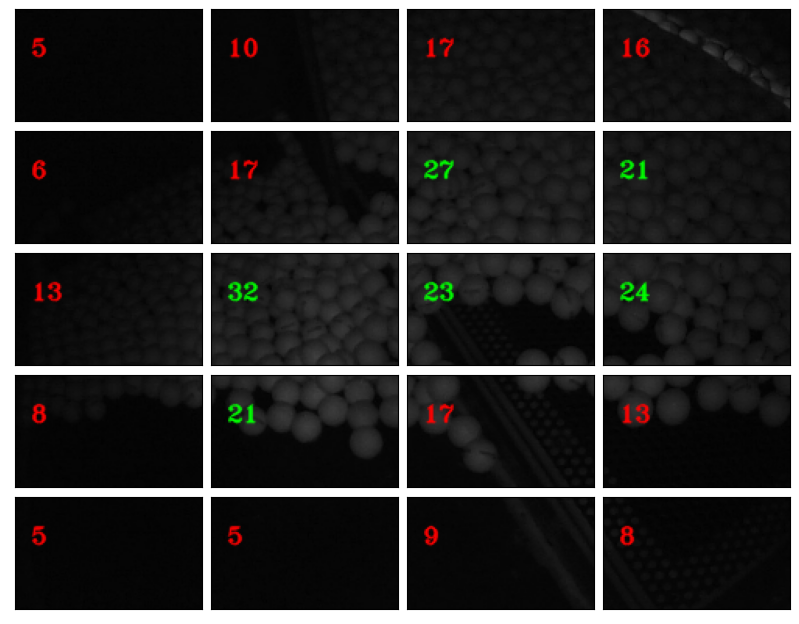

In [ ]:
#@title 画像の読み込み、画像の分割、画像の評価 { run: "auto" }

# パラメータのフォーム
filename = 'e_low' #@param ["a_low", "b_low", "c_low", "d_low", "e_low", "f", "g", "h", "i"]


# 画像の読み込み
gray = cv2.imread(filename + '.jpg', cv2.IMREAD_GRAYSCALE)
gray = imResize(gray)


# 画像を分割する
rows = 5  # 行数
cols = 4  # 列数

chunks = []
for row_img in np.array_split(gray, rows, axis=0):
  for chunk in np.array_split(row_img, cols, axis=1):
    chunks.append(chunk)


# 画像処理
plt.figure(figsize=(10, 8), dpi=100)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

print('ave = ' + str(int(np.mean(chunks))))

level = int(np.mean(chunks) * .6)
if level < 20:
  level = 20
print('level = ' + str(level))

for i in range(len(chunks)):
  ave = int(np.mean(chunks[i]))
  if ave > level:
    color = np.array([0., 255., 0.])
  else:
    color = np.array([255., 0., 0.])
  img_rgb = cv2.cvtColor(chunks[i], cv2.COLOR_GRAY2RGB)
  cv2.putText(img = img_rgb, text = str(ave), org = (10, 30), fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 0.5, color = color, lineType = cv2.LINE_AA)
  plt.subplot(rows, cols, i+1)
  plt.imshow(img_rgb)
  plt.title('')
  plt.xticks([])
  plt.yticks([])